In [2]:
from datetime import datetime
import pandas as pd
import plotly.graph_objects as go
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
import streamlit as st

c:\Users\rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
start_date = '2002-01-06'
end_date = datetime.today().strftime('%Y-%m-%d')

def get_stock_data(stock ,start_date, end_date):
    data = yf.download(stock, start_date, end_date)
    return data
stock = 'googl'

stock_data= get_stock_data(stock, start_date, end_date)


[*********************100%***********************]  1 of 1 completed


In [7]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...,...
4537,2022-08-26,114.720001,115.120003,110.190002,110.339996,110.339996,37245700
4538,2022-08-29,109.989998,110.949997,108.800003,109.419998,109.419998,21191200
4539,2022-08-30,110.169998,110.500000,107.800003,108.940002,108.940002,27513300
4540,2022-08-31,110.650002,110.849998,108.129997,108.220001,108.220001,28627000


In [6]:
stock_data.reset_index(inplace=True)

In [25]:
def plot_stock_price(Stock_data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=Stock_data['Date'], y=Stock_data['Close'], name='Close'))
    fig.add_trace(go.Scatter(x=Stock_data['Date'], y=Stock_data['Low'], name='Low'))
    fig.update_layout(title=stock+' Stock Price', xaxis_title='Date', yaxis_title='Price', xaxis_rangeslider_visible=True)
    return fig.show()

In [26]:
plot_stock_price(stock_data)

In [27]:
train = stock_data[['Date','Close']]
train = train.rename(columns={"Date": "ds", "Close": "y"})
train.head()

,ds,y
0,2004-08-19,2.511011
1,2004-08-20,2.710460
2,2004-08-23,2.737738
3,2004-08-24,2.624374
4,2004-08-25,2.652653


In [28]:
preset_stock = pd.read_csv('stock name.csv')

In [31]:
preset_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8180 entries, 0 to 8179
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      8179 non-null   object 
 1   Name        8180 non-null   object 
 2   Last Sale   8180 non-null   object 
 3   Net Change  8180 non-null   float64
 4   % Change    8179 non-null   object 
 5   Market Cap  7652 non-null   float64
 6   Country     7384 non-null   object 
 7   IPO Year    4963 non-null   float64
 8   Volume      8180 non-null   int64  
 9   Sector      6808 non-null   object 
 10  Industry    6807 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 703.1+ KB


In [33]:
preset_stock['Name'][0]

'Agilent Technologies Inc. Common Stock'

In [34]:
preset_stock = preset_stock[['Name','Symbol']]

In [37]:
preset_stock.reset_index

<bound method DataFrame.reset_index of                                                    Name Symbol
0                Agilent Technologies Inc. Common Stock      A
1                       Alcoa Corporation Common Stock      AA
2     Ares Acquisition Corporation Class A Ordinary ...    AAC
3      ATA Creativity Global American Depositary Shares   AACG
4                       Armada Acquisition Corp. I Unit  AACIU
...                                                 ...    ...
8175  Zurn Elkay Water Solutions Corporation Common ...    ZWS
8176                         Zymergen Inc. Common Stock     ZY
8177                       Zymeworks Inc. Common Shares   ZYME
8178          Zynerba Pharmaceuticals Inc. Common Stock   ZYNE
8179                            Zynex Inc. Common Stock   ZYXI

[8180 rows x 2 columns]>

In [38]:
preset_stock.to_csv('stock name.csv')

In [42]:
train = stock_data[['Date','Close']]
train = train.rename(columns={"Date": "ds", "Close": "y"})

2022-09-02 20:16:41.733 DEBUG   cmdstanpy: cmd: where.exe tbb.dll
cwd: None
2022-09-02 20:16:42.034 DEBUG   cmdstanpy: TBB already found in load path
2022-09-02 20:16:42.066 INFO    prophet: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-09-02 20:16:42.129 DEBUG   cmdstanpy: input tempfile: C:\Users\rahul\AppData\Local\Temp\tmp6ut5dpv8\ndp4qhtc.json
2022-09-02 20:16:42.257 DEBUG   cmdstanpy: input tempfile: C:\Users\rahul\AppData\Local\Temp\tmp6ut5dpv8\1c93ar6w.json
2022-09-02 20:16:42.265 DEBUG   cmdstanpy: idx 0
2022-09-02 20:16:42.266 DEBUG   cmdstanpy: running CmdStan, num_threads: None
2022-09-02 20:16:42.267 DEBUG   cmdstanpy: CmdStan args: ['C:\\Users\\rahul\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=80016', 'data', 'file=C:\\Users\\rahul\\AppData\\Local\\Temp\\tmp6ut5dpv8\\ndp4qhtc.json', 'init=C:\\Users\\rahul\\AppData\\Local\\Temp\\tmp6ut5dpv8\\1c93ar6w

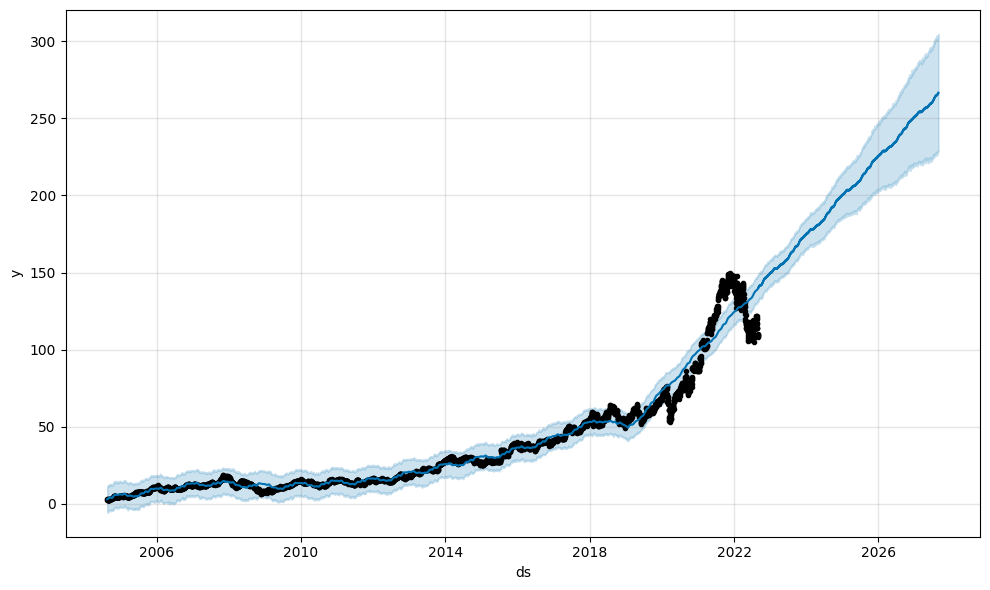

In [44]:
period = 365 *5
model = Prophet()
model.fit(train)
future = model.make_future_dataframe(period)
forecast = model.predict(future)
fig = model.plot(forecast)

In [61]:
last_index = len(forecast)-1
today_index = forecast.index[forecast['ds'] == end_date].tolist()[0]

In [68]:
profit = forecast['yhat'][last_index]*100/forecast['yhat'][today_index]
profit 

190.39516955972007